In [1]:
from data_treat.get_ready_data import get_data
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve, auc # метрики качества
from sklearn.metrics import confusion_matrix, accuracy_score # метрики качества
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from data_treat.data_normalizer import CustomNormalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

In [2]:
COLUMNS = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price",
           "repeat_retailer","used_chip","used_pin_number","online_order", "fraud"]

In [21]:
def feture_importants(importantance):
    res = '\n feature_importance \n'
    for ind, imp in enumerate(importantance):
        res += f"{COLUMNS[ind]} :  {imp}\n"

    return res

In [3]:
data = get_data()
pd.value_counts(data['fraud'])

1.0    87403
0.0    87403
Name: fraud, dtype: int64

In [4]:
data.values

array([[9.36939175e+00, 4.50364999e-02, 5.07145824e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.93794246e+01, 8.98597564e+00, 8.84458130e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.18260737e+01, 2.57385424e+00, 1.50915051e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.78470100e+00, 5.70407186e-01, 6.11381926e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [6.20817917e+00, 3.99892585e+00, 4.51287405e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.10703065e+02, 6.61342880e-01, 3.29286312e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [5]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
907786,9.369392,0.045036,5.071458,1.0,0.0,0.0,1.0,1.0
71301,39.379425,8.985976,0.884458,1.0,1.0,0.0,1.0,0.0
1199,11.826074,2.573854,1.509151,1.0,1.0,0.0,0.0,0.0
73429,29.011415,2.545547,5.062095,1.0,1.0,0.0,1.0,1.0
819251,10.327236,1.540556,7.535212,1.0,0.0,0.0,1.0,1.0


In [6]:
target_variable_name = 'fraud'
labels = data[target_variable_name]
data = data.drop(target_variable_name, axis=1)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.33)

In [23]:
def model_func(x_train,x_test):
    def gridSearch(X,y):

        param_dict = {
        "penalty" : ['none','l2','l1','elasticnet']
        }
        model = LogisticRegression(random_state=0)
        gv = GridSearchCV(model,param_grid=param_dict)
        gv.fit(X,y)
        return gv.best_score_,gv.best_params_

    params = gridSearch(x_train, y_train)
    print(params)

    model = LogisticRegression(penalty = params[1]['penalty'],random_state=0)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    print("Accuracy : ",accuracy_score(y_test,predictions)*100)
    print(confusion_matrix(y_test, predictions))

    test_probabilities = model.predict_proba(x_test)
    test_probabilities = test_probabilities[:, 1]
    false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, test_probabilities)

    plt.figure(figsize=(7, 7))

    # рисуем кривую
    plt.plot(false_positive_rates, true_positive_rates, label='Сглаженные значения ROC-AUC')

    # кривая, соответствующая случайному угадыванию
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', label='Модель, выдающая случайное значение')

    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.fill_between(false_positive_rates, true_positive_rates, step="mid", alpha=0.4, label='площадь под кривой (ROC-AUC)')
    plt.legend()
    plt.show()

    roc_auc_value = roc_auc_score(y_test, test_probabilities)

    print("ROC-AUC на тестовой выборке:", roc_auc_value)

    print(feture_importants(model.coef_[0]))



Для сырых данных

c:\Users\Roflinyo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\Roflinyo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

(0.9387465846994534, {'penalty': 'none'})


c:\Users\Roflinyo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy :  94.13895919287175
[[26992  1997]
 [ 1384 27313]]


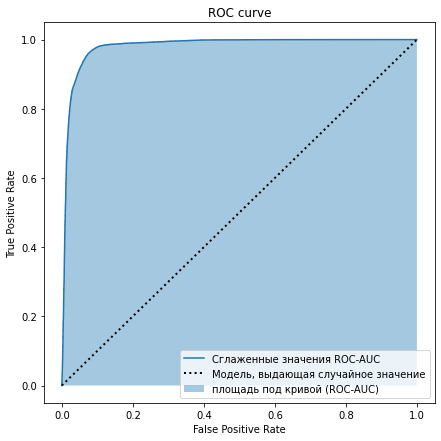

ROC-AUC на тестовой выборке: 0.9802064385269523

 feature_importance 
distance_from_home :  0.0271727568283446
distance_from_last_transaction :  0.04805730117763258
ratio_to_median_purchase_price :  1.1745366903702732
repeat_retailer :  -1.2776208043611752
used_chip :  -1.266176551823019
used_pin_number :  -9.567865146958859
online_order :  5.0495156669800885



In [24]:
model_func(x_train,x_test)

Для нормализованных данных

c:\Users\Roflinyo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\Roflinyo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Roflinyo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
 

(0.9393186475409836, {'penalty': 'none'})
Accuracy :  84.38789307630967
[[20006  8983]
 [   23 28674]]


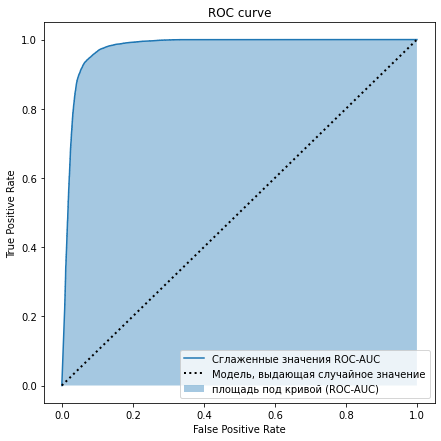

ROC-AUC на тестовой выборке: 0.9747901211266414

 feature_importance 
distance_from_home :  294.2757802339272
distance_from_last_transaction :  102.4206027167263
ratio_to_median_purchase_price :  316.20934015500296
repeat_retailer :  -1.3841772830671744
used_chip :  -1.1904584412243806
used_pin_number :  -9.886189889870023
online_order :  4.919731621903085



In [25]:
model_func(CustomNormalizer.normalize(x_train),CustomNormalizer.normalize(x_test))

Для стандартизированных данных

c:\Users\Roflinyo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Roflinyo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Roflinyo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Roflinyo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\Users\Roflinyo\App

(0.9393271857923498, {'penalty': 'none'})
Accuracy :  94.12855805568076
[[26986  2003]
 [ 1384 27313]]


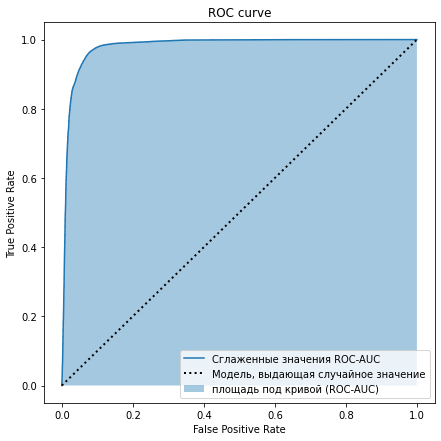

ROC-AUC на тестовой выборке: 0.9804398711781902

 feature_importance 
distance_from_home :  2.915025460904447
distance_from_last_transaction :  1.7178652157127028
ratio_to_median_purchase_price :  5.6540234882032605
repeat_retailer :  -0.4499000769853898
used_chip :  -0.549444001714829
used_pin_number :  -2.3059535234144315
online_order :  2.0235916383833596



In [26]:
model_func(CustomNormalizer.standardize(x_train),CustomNormalizer.standardize(x_test))